### Machine Learnign from Scratch is an attempt to explain the concepts of statistical algorithms via code
#### This is only possible because of the brilliant statisitical video series on YouTube by Bradon's simple linear regression series 
##### https://www.youtube.com/watch?v=ZkjP5RJLQF4&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi

##### Problem Statement

Let's assume you are a small restaurant owner or a business minded server at a small restaurant. Here "tips" are a very important part of server's pay. Most often the rupee value of the tip is related to rupee amount of the total bill.

As the server or the owner, you want to develop a model that will allow you to make a prediction about what amount of tip to expect for any given amount of total bill. 

Therefore one evening, you collect data for 10 meals.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib

%matplotlib inline

In [2]:
tips = pd.DataFrame([20, 10, 50, 60, 90, 20, 30, 15, 75, 35], columns = ['Tips'])
tips.index += 1
tips.index.name = 'Meals'
tips

,Tips
Meals,
1,20
2,10
3,50
4,60
5,90
6,20
7,30
8,15
9,75


Unfortunately when you begin to look at the data, you realise you had only collected data for the tip amount and not the total bill amount. 

So, this is the best data you have.

###### So now you are thinking, how you might predict the tip amount of the future meals using only this data ?

Let's first start by visualizing the data

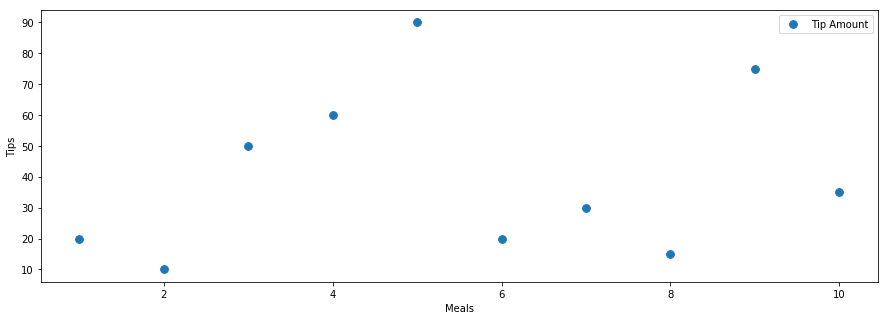

In [3]:
tips.reset_index().plot.scatter(x=tips.index.name, y='Tips', label='Tip Amount', s=60, figsize=(15, 5))

##### Question: How would you come up with the guess for the next meal using only one variable ?

We will use the mean. Mean of 10 meals is


In [4]:
next_tip = tips.mean()
next_tip

Tips    40.5
dtype: float64

Text(7,55,'Best fit line')

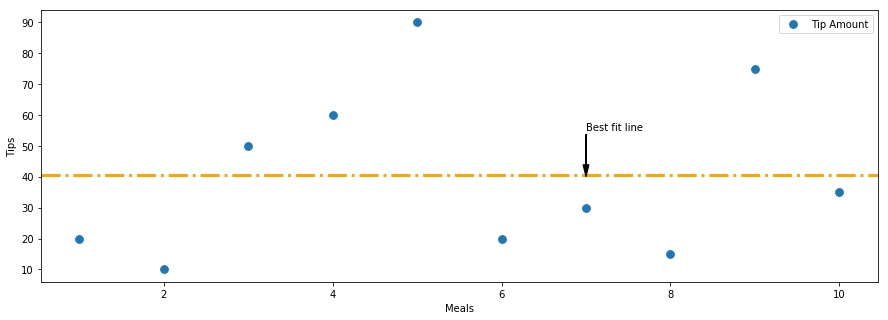

In [5]:
plot = tips.reset_index().plot.scatter(x=tips.index.name, y='Tips', label='Tip Amount', s=60, figsize=(15,5))
plot.axhline(next_tip[0], linestyle='dashdot', color='orange', linewidth=3, label='Best fit')
plot.annotate('Best fit line', xy=(7, 40), xytext=(7, 55), arrowprops=dict(facecolor='black', width=1, headwidth=6))

#### NOTE: With only one variable, and no other information, the best prediction for the next measurement is the mean of the sample itself. The variability in the tip amounts can only be explained by the tips themselves. 

So, the best prediction for tip amount for the 11th meal, is Rs. 40.5

##### Analysis: How good is this fit for all data points?

Obviously you know, the data points do not fall on the 40.5 line. Some are above and some are below it. So that tell us, how good this line fits our data points. 

Now, what we can do is measure the distance the data points are from the best fit line.

Text(7,30,'   -9.5')

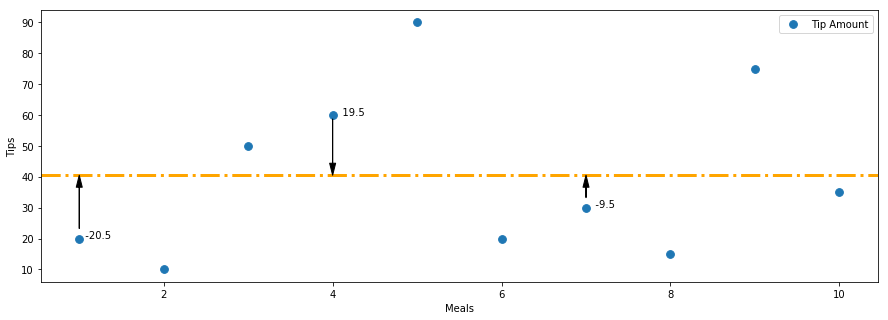

In [6]:
plot = tips.reset_index().plot.scatter(x=tips.index.name, y='Tips', label='Tip Amount', s=60, figsize=(15,5))
plot.axhline(next_tip[0], linestyle='dashdot', color='orange', linewidth=3, label='Best fit')
plot.annotate('  -20.5', xy=(1, 40.5), xytext=(1, 20), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   19.5', xy=(4, 40.5), xytext=(4, 60), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   -9.5', xy=(7, 40.5), xytext=(7, 30), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))

For first meal, the tip was 20, so it was 20 below 40.5, hence -20.5. Similarly for the third meal it was 60, so it was 19.5 above 40.5 and so on for others. 

So, these are the distances by which each observed value is different/deviates from mean of 40.5. 

There is a name for this, it's called Residuals or Errors.

Text(5,55,'RESIDUALS (ERRORS)')

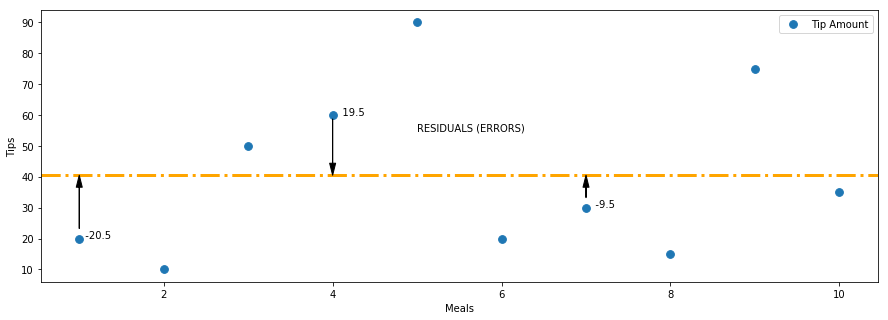

In [8]:
plot = tips.reset_index().plot.scatter(x=tips.index.name, y='Tips', label='Tip Amount', s=60, figsize=(15,5))
plot.axhline(next_tip[0], linestyle='dashdot', color='orange', linewidth=3, label='Best fit')
plot.annotate('  -20.5', xy=(1, 40.5), xytext=(1, 20), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   19.5', xy=(4, 40.5), xytext=(4, 60), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   -9.5', xy=(7, 40.5), xytext=(7, 30), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('RESIDUALS (ERRORS)', xy= (5, 50), xytext=(5, 55)) 

##### NOTE:  Residuals  or Error: The distance from the best fit line to the observed values. 

In [9]:
tips['Tips'] = tips['Tips'].astype(float) 
tips['Residuals'] = tips['Tips'] - float(next_tip)
tips

,Tips,Residuals
Meals,,
1,20.0,-20.5
2,10.0,-30.5
3,50.0,9.5
4,60.0,19.5
5,90.0,49.5
6,20.0,-20.5
7,30.0,-10.5
8,15.0,-25.5
9,75.0,34.5


Now, if you add up all the residuals you will see it comes out to 0

In [10]:
sum_of_residuals = tips['Residuals'].sum()
sum_of_residuals

0.0

#### NOTE: So, the Residuals always add up to 0. This is an important concept to keep in mind as we move forward.

In [11]:
tips['Squared_Residuals'] = tips['Residuals'] * tips['Residuals']
tips

,Tips,Residuals,Squared_Residuals
Meals,,,
1,20.0,-20.5,420.25
2,10.0,-30.5,930.25
3,50.0,9.5,90.25
4,60.0,19.5,380.25
5,90.0,49.5,2450.25
6,20.0,-20.5,420.25
7,30.0,-10.5,110.25
8,15.0,-25.5,650.25
9,75.0,34.5,1190.25


#### Why square the residuals ?

1. Makes them positive
2. Emphasizes larger deviations

In [12]:
# Sum of squared erros
sse = tips['Squared_Residuals'].sum()
sse

6672.5

When we say sum of square, we literally mean the sum of squares.

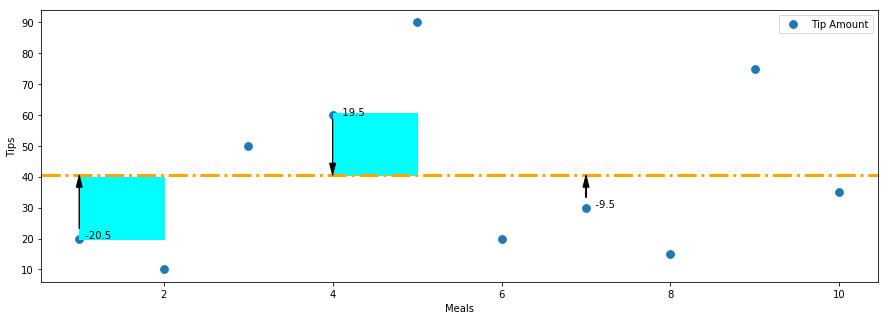

In [13]:
plot = tips.reset_index().plot.scatter(x=tips.index.name, y='Tips', label='Tip Amount', s=60, figsize=(15,5))
plot.axhline(next_tip[0], linestyle='dashdot', color='orange', linewidth=3, label='Best fit')
plot.annotate('  -20.5', xy=(1, 40.5), xytext=(1, 20), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   19.5', xy=(4, 40.5), xytext=(4, 60), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))
plot.annotate('   -9.5', xy=(7, 40.5), xytext=(7, 30), arrowprops=dict(facecolor='black', width=0.1, headwidth=6))

import matplotlib.patches as patches
rect = patches.Rectangle(xy=(1, 20), width=1, height=20, color='cyan')
plot.add_patch(rect)
rect = patches.Rectangle(xy=(4, 40.5), width=1, height=20, color='cyan')
plot.add_patch(rect)

#### NOTE: The goal of simple linear regression is to create a linear model that minimizes the sum of squares of the residuals/error (SSE).


So, what we do is we create a different line from the data once we introduce another independent variable that will minimize the size of the squares. 

If our regression model is significant, it will "reduce" the SSE we had when we assumed that the independent variable did not even exist. 

The regression line will/should literally "fit" the data better. 

It will minimize the residuals.

### Quick Review

- Simple linear regression is really a comparision of two models
    -  One is where the independent variable does not exist
    -  And the other use the best fit regression line
- If there is only one variable, the best prediction for other values is the mean of the "dependent" variable
- The difference between the best-fit line and the observed value is called the residual or error
- The residuals are squared and then added together to generate sum of squares residuals/errors, SSE
- Simple linear regression is designed to find the best fitting line through the data that minimizes the SSE
- With only dependent variable, the only sum of squares is due to error. Therefore, it is the total and <b>MAXIMUM</b> sum of squares for the data under analysis.